### Masive Data Lab Activities

Description : Read and Cleaning Data
File        : litecoin_price.csv 
Name        : Yudi Aditya

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Bitcoin Cash Price

#### 1. Reading Data

In [2]:
# Read Bitcoin Cash Price
df1 = pd.read_csv('../data/raw/cryptocurrencypricehistory/litecoin_price.csv', parse_dates = ['Date'])
df1.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,65.25,72.44,59.05,71.29,1016090000,3444150000
1,2017-09-04,76.73,76.73,61.24,65.21,922041000,4049140000
2,2017-09-03,78.98,82.83,73.61,76.84,675462000,4166600000
3,2017-09-02,85.83,92.07,72.23,79.02,1363990000,4526680000
4,2017-09-01,70.86,87.41,70.01,86.04,1551740000,3735870000


In [3]:
type(df1.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
# Set Date as it's index
df1.set_index('Date', inplace = True )

In [5]:
# Get General Information regarding data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1592 entries, 2017-09-05 to 2013-04-28
Data columns (total 6 columns):
Open          1592 non-null float64
High          1592 non-null float64
Low           1592 non-null float64
Close         1592 non-null float64
Volume        1592 non-null object
Market Cap    1592 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 87.1+ KB


- The data frame has 1592 entries and 6 columns. 
- All columns has 1592 elements, probably there's no missing data. Especially for Open, high, Low, Close, and market cap. To make it sure, We'll see for this
- Volume and Market Cap's data type are an object, it should be number.

In [6]:
# Replace missing data as NaN
df1.replace('-', np.nan,inplace=True)
# Count missing data
df1.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume        243
Market Cap      0
dtype: int64

#### 2. Cleaning Data Part (Deal with Wrong Format)

Problem :
- Some data has different format, therefore Volume and Market Cap recognize as a string, not a number.
- There are missing data in column volume

Solution:
- Convert to float number
- Using Fillna or interpolation Method

In [7]:
print('Volume Data Type :', type(df1.Volume[0]))

Volume Data Type : <class 'str'>
Market Cap Data Type : <class 'numpy.int64'>


In [8]:
#convert data to number
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df1.Volume = df1.Volume.apply(convert_to_number)

df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1592 entries, 2017-09-05 to 2013-04-28
Data columns (total 6 columns):
Open          1592 non-null float64
High          1592 non-null float64
Low           1592 non-null float64
Close         1592 non-null float64
Volume        1349 non-null float64
Market Cap    1592 non-null int64
dtypes: float64(5), int64(1)
memory usage: 167.1 KB


In [9]:
df1.describe()

,Open,High,Low,Close,Volume,Market Cap
count,1592.000000,1592.000000,1592.000000,1592.000000,1.349000e+03,1.592000e+03
mean,8.470741,8.870232,8.068172,8.510704,3.845104e+07,3.430766e+08
std,11.536448,12.246791,10.817646,11.641428,1.351195e+08,5.718122e+08
min,1.150000,1.340000,1.110000,1.160000,4.817140e+05,3.794370e+07
25%,3.050000,3.120000,2.970000,3.050000,1.712650e+06,1.186832e+08
50%,3.840000,3.880000,3.780000,3.835000,2.917800e+06,1.702760e+08
75%,7.780000,8.180000,7.552500,7.790000,7.278630e+06,2.432428e+08
max,85.830000,92.070000,73.610000,86.040000,1.730780e+09,4.526680e+09


#### 3. Cleaning Data 2 (Deal with Missing Data)

In [10]:
df1.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume        243
Market Cap      0
dtype: int64

In [15]:
#new_df is the data with non NaN value
new_df = df1[np.isfinite(df1['Volume'])]
new_df.tail()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-12-31,24.51,24.60,23.71,24.35,7446870.0,598381000
2013-12-30,23.89,24.95,23.74,24.38,12439600.0,582721000
2013-12-29,22.56,24.39,22.20,24.07,11384200.0,549577000
2013-12-28,23.19,23.22,21.93,22.56,11003700.0,564204000
2013-12-27,24.81,25.27,22.26,23.27,31112200.0,602608000


In [16]:
# Lets see the correlation between each column
correlation = new_df.corr(method="pearson")
correlation

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.997364,0.997797,0.995452,0.740296,0.974086
High,0.997364,1.000000,0.996575,0.998568,0.767737,0.972690
Low,0.997797,0.996575,1.000000,0.997477,0.730245,0.971490
Close,0.995452,0.998568,0.997477,1.000000,0.759967,0.971313
Volume,0.740296,0.767737,0.730245,0.759967,1.000000,0.784359
Market Cap,0.974086,0.972690,0.971490,0.971313,0.784359,1.000000


In the data frame above, we can inferred that Volume has a relationship (Linear) with Market cap.

Text(0, 0.5, 'Volume')

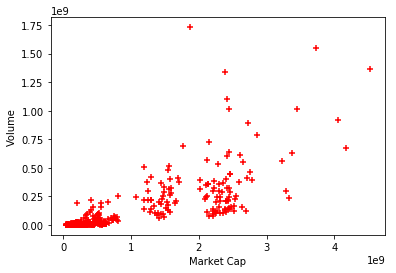

In [23]:
# import matplotlib.pyplot as plt
plt.scatter(new_df['Market Cap'],new_df.Volume,marker='+',color='red')
plt.xlabel('Market Cap')
plt.ylabel('Volume')

In [17]:
from sklearn import linear_model

model    = linear_model.LinearRegression()
x        = new_df[['Market Cap']]
y        = new_df['Volume']

In [18]:
# train data using linear regression 
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
# Model Score
model.score(x, y)

0.6152195535166604

In [21]:
# Fill Missing Data Using linear model prediction 
# and Assign it to new column
x = df1[['Market Cap']]
y = model.predict(x) 
df1['Volume Predict'] = y.astype('int64')
df1[df1['Volume'].isnull()].head()

,Open,High,Low,Close,Volume,Market Cap,Volume Predict
Date,,,,,,,
2013-12-26,21.65,25.42,21.65,24.76,NaN,525226000,63838249
2013-12-25,17.65,21.15,17.09,21.15,NaN,427762000,46820521
2013-12-24,17.81,18.11,17.09,17.64,NaN,431173000,47416100
2013-12-23,16.74,18.04,16.69,17.89,NaN,404707000,42794997
2013-12-22,16.60,18.23,16.19,16.86,NaN,401059000,42158037


#### 4. Data Visualization

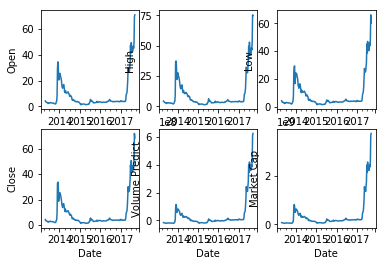

In [22]:
# Visualization the average of Open based on time (Week)
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df1.Open.resample('W').mean().plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df1.High.resample('W').mean().plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df1.Low.resample('W').mean().plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df1.Close.resample('W').mean().plot()

plt.subplot(2,3,5)
plt.ylabel('Volume Predict')
df1['Volume Predict'].resample('W').mean().plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap')
df1['Market Cap'].resample('W').mean().plot()